In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

salaries = pd.read_csv('ds_salaries_clean.csv')

print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


In [ ]:
# Creating the dict with the median salary for each group
salaries_dict = salaries.groupby("Experience")["Salary_USD"].median().to_dict()

print(salaries_dict)
# {'Entry': 55380.0, 'Executive': 135439.0, 'Mid': 74173.5, 'Senior': 128903.0}

# Mapping the values
salaries["Salary_USD"] = salaries["Salary_USD"]. \
		fillna(salaries["Experience"].map(salaries_dict))

print(salaries.isna().sum())

In [ ]:
# need to look for the dataset
planes = pd.read_csv('planes.csv')

# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

In [ ]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to the missing values
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

### Converting and analyzing categorical data

In [2]:
# Prewewing the data
print(salaries.select_dtypes("object").head())

                  Designation Experience Employment_Status Employee_Location  \
0              Data Scientist        Mid                FT                DE   
1  Machine Learning Scientist     Senior                FT                JP   
2           Big Data Engineer     Senior                FT                GB   
3        Product Data Analyst        Mid                FT                HN   
4   Machine Learning Engineer     Senior                FT                US   

  Company_Size  
0            L  
1            S  
2            M  
3            S  
4            L  


In [3]:
# Job titles
print(salaries["Designation"].value_counts())

print(salaries["Designation"].nunique())

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

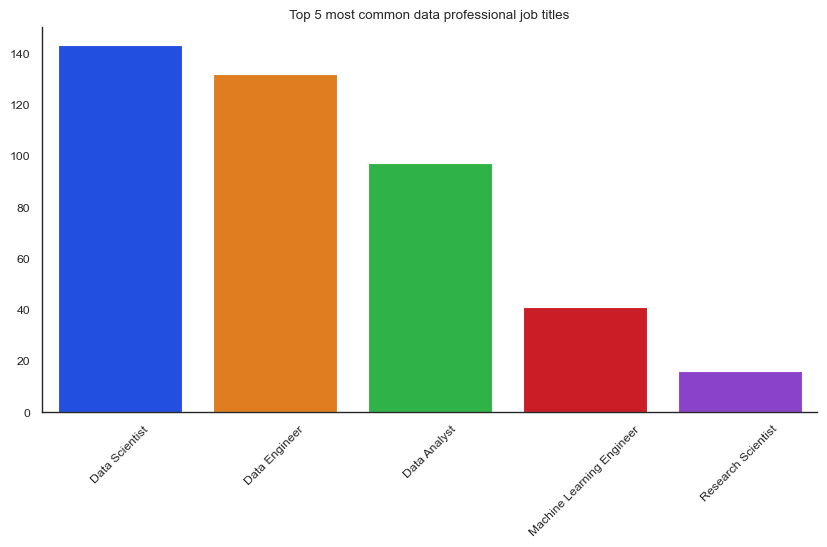

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

designations = salaries["Designation"].value_counts().sort_values(ascending=False)

# get the top 5
top_5_designations = designations[:5]

# Plot the top 5 designations
sns.countplot(x="Designation", data=salaries, order=top_5_designations.index)

# increase the size of the plot
sns.set_context()

# set the background color to white
sns.set_style("white")
sns.despine()

sns.set_palette("bright")

plt.xticks(rotation=45)

plt.title("Top 5 most common data professional job titles")

# remove x and y labels
plt.xlabel("")
plt.ylabel("")

plt.show()

In [ ]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

In [ ]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short_flights
short_flights = "0h|1h|2h|3h|4h"

# Create medium_flights
medium_flights = "5h|6h|7h|8h|9h"

# Create long_flights
long_flights = "10h|11h|12h|13h|14h|15h|16h"

In [ ]:
import numpy as np

# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

In [ ]:
# Preview the column
print(planes["Duration"].head())

# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", "")

# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)

# Plot a histogram
sns.histplot(data=planes, x="Duration")
plt.show()

In [ ]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())

# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

In [ ]:
# Plot a histogram of flight prices
sns.histplot(data=planes, x="Price")
plt.show()

# Display descriptive statistics for flight duration
print(planes["Duration"].describe())

In [ ]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())